In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!python --version

Python 3.6.9


In [ ]:
!pip install /content/gdrive/MyDrive/ML_Project2/scpyro/

Processing ./gdrive/MyDrive/ML_Project2/scpyro
     |████████████████████████████████| 614kB 15.4MB/s 
     |████████████████████████████████| 7.7MB 50.1MB/s 
     |████████████████████████████████| 122kB 58.7MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
  Created wheel for scpyro: filename=scpyro-0.0.1-cp36-none-any.whl size=26006 sha256=862e7ff824db936b221ca39f7afa4dcd81e7ea1934676f8d5a28fcf32a56d3c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-84e_zs45/wheels/a9/ff/b7/8404f5b160411490ad00f72b8ccf9aaf31181f6b66ba60c01d
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49715 sha256=43371b6369a9619f19a0e281e8649ec0a906889a62ba73038911e692b19979d6
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
  Created wheel for sinfo: filename=sinfo-0.3.1-cp36-none-any.whl size=7016 sha256=343fa0

In [ ]:
!pip install /content/gdrive/MyDrive/ML_Project2/latenta/

Processing ./gdrive/MyDrive/ML_Project2/latenta
  Created wheel for latenta: filename=latenta-0.0.0.99-cp36-none-any.whl size=109480 sha256=753c6c51d09adacd0f349e2e40cba342bee53e477d3b24a56af14284518e64e3
  Stored in directory: /tmp/pip-ephem-wheel-cache-odxfh1fc/wheels/54/5d/fb/5ed343c1bb8fbf312f5bfbfd4d99b65e5ac26cbff33c66ed60
Successfully built latenta


In [ ]:
!pip install /content/gdrive/MyDrive/ML_Project2/latento/

Processing ./gdrive/MyDrive/ML_Project2/latento
     |████████████████████████████████| 184kB 12.8MB/s 
     |████████████████████████████████| 481kB 28.2MB/s 
     |████████████████████████████████| 32.1MB 108kB/s 
  Created wheel for latento: filename=latento-0.0.1-cp36-none-any.whl size=10495 sha256=15003fda589aa0133cd120c97bc07a341011d8a0d1e1e56f476a1d565748f9ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-mm0a4t8q/wheels/26/64/70/06b576feab06a3f68a169dbb347684f9a95068d17feb87e5d0
  Created wheel for jax: filename=jax-0.2.3-cp36-none-any.whl size=542177 sha256=2964e738edaa9a4262553f2166ddcd21962e06db6c9ec74501cad89d6a964813
  Stored in directory: /root/.cache/pip/wheels/12/30/5d/24b5503a9bbf06bdd0d57bd20a87ef56125581b862731e4a2d
Successfully built latento jax
  Found existing installation: jax 0.2.7
    Uninstalling jax-0.2.7:
      Successfully uninstalled jax-0.2.7
  Found existing installation: jaxlib 0.1.57+cuda101
    Uninstalling jaxlib-0.1.57+cuda101:
      Successfully

In [ ]:
!pip install 'https://storage.googleapis.com/jax-releases'/cuda101/jaxlib-0.1.56+cuda101-cp36-none-manylinux2010_x86_64.whl

     |████████████████████████████████| 145.1MB 47kB/s 
  Found existing installation: jaxlib 0.1.56
    Uninstalling jaxlib-0.1.56:
      Successfully uninstalled jaxlib-0.1.56


In [ ]:
pip install --upgrade jax==0.2.3

Requirement already up-to-date: jax==0.2.3 in /usr/local/lib/python3.6/dist-packages (0.2.3)


In [ ]:
pip install --upgrade numpyro==0.4.1

Requirement already up-to-date: numpyro==0.4.1 in /usr/local/lib/python3.6/dist-packages (0.4.1)


In [ ]:
# autoreloading is nice so that any changes you make to the package will automatically be reloaded
# this works for all classes and functions, so if you want to debug something you can just add a print or embed and it will work!
#%load_ext autoreload
%reload_ext autoreload
%autoreload 2


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import jax
import jax.numpy as jnp

import numpyro

# this is the main package in which you will be working
import latento

# this is the package I am developing based on pyro
# it contains a lot of things which you won't use
# you'll only use the synthetic data generator
import latenta

# this is a biological package for plotting single-cell data
import scanpy as sc

# we use this package for some helper functions for plotting
import scpyro

In [ ]:
import numpyro
import jax
jax.lib.xla_bridge.get_backend().platform

'tpu'

In [ ]:
# set this to gpu if you get it to work (and if it is faster)
numpyro.set_platform('gpu')
# test gpu

key = jax.random.PRNGKey(0)
numpyro.set_host_device_count(1)

In [ ]:
import torch

torch.cuda.device_count()

1

## Biological background

Multicellular organisms are composed of cells. Cells have different functions, and this is for example reflected in differences in gene activity, also called **gene expression**, or the **transcriptome**. Genes that are more active have more "copies" present in the cell. There are now technologies that make it possible to read out the number of mRNAs inside a cell for each gene (=> count data). What we get from these technologies is a matrix with for each cell a value for each gene.

To know more: 
- https://en.wikipedia.org/wiki/Central_dogma_of_molecular_biology
- https://en.wikipedia.org/wiki/Transcriptomics_technologies
- https://en.wikipedia.org/wiki/Single-cell_transcriptomics

We are interested in how this gene expression changes dependening on the type of cell, its location in our body, or external circumstances. One way to study this is by perturbing the cell, e.g. by adding some chemicals or adding an extra gene to the cell. We often have two conditions: a control condition in which we did not perturb the cells, and a perturbed condition in which we perturbed the cells to a certain magnitude (which we know). We now want to know what this perturbation does to the cell, i.e. how it affects the transcriptome. There are many models to make here, some including latent variables, but here we'll focus on generalized linear models, in which the expression of each gene depends on the magnitude of perturbation in some linear or non-linear way. A gene can respond in different ways to this: it can increase linearly with the magnitude of a perturbation, it can suddenly jump up or down once the perturbation reaches a certain threshold, it can do nothing, ... 

The goal is to use Bayesian modelling to select appropriate models for each gene, and to know how uncertain we are. If we are too uncertain, it may we worthwhile to get more samples (i.e. cells) so that we can get a better model.

Bayesian modelling can however be quite slow, especially because we're working with a lot of cells (>10k) and a lot of genes (5-20k). I'm therefore using approximate Bayesian techniques called variational inference. But I do not know whether these approximations are correct. The goal of this project is to compare variational inference posteriors with exact posteriors derived from MCMC.

For now, you'll work with synthetic data to make sure that the implementation & mathematical reasoning is correct. Once you've done this, I'll provide you with real data!

## Generate the dataset

In [ ]:
# the structure of the toy dataset
# feel free to adapt these parameters, e.g. to test scalability
config = {
    "id":"toy",
    "n_cells":400,
    "modules":[
        {"id":"add_uniform_perturbation"}, # adds a perturbation to each cell
        {"id":"add_perturbation_switch"}, # adds a global switch point
        {"id":"add_nothing", "n":10}, # adds n genes that stay the same in all cells
        {"id":"add_perturbed_linear", "n":10}, # adds n genes of which the expression changes linearly with the perturbation
        {"id":"add_perturbed_switch", "n":10} # adds n genes of which the expression changes at the switch point
    ]
}

In [ ]:
# creates the toy
toy = latenta.toy.wrap.cases.get_case(config)

# sample the count data
latenta.toy.sample.sample(toy)

# create a dataset object out of this
dataset = latenta.toy.wrap.wrap_model(toy)

# create a "latento" dataset (=numpyro) instead of a "latenta" (=pyro) one
dataset = latento.dataset.PerturbedDataset.from_latenta(dataset)

In [ ]:
# dataset.obs contains info on cells
dataset.obs

# dataset.n_features.head(5)

,cell_ix,cell,library,x_perturb,x_perturb_log
cell,,,,,
cell_0,0,cell_0,150,9867.641380,9.197117
cell_1,1,cell_1,150,0.000000,0.000000
cell_2,2,cell_2,150,146.518499,4.993954
cell_3,3,cell_3,150,0.000000,0.000000
cell_4,4,cell_4,150,31.140948,3.470131
...,...,...,...,...,...
cell_395,395,cell_395,150,7308.039678,8.896867
cell_396,396,cell_396,150,18.560144,2.973494
cell_397,397,cell_397,150,0.000000,0.000000


In [ ]:
# dataset.counts contains the raw counts
dataset.counts

gene,nothing_1,nothing_2,nothing_3,nothing_4,nothing_5,nothing_6,nothing_7,nothing_8,nothing_9,nothing_10,x_linear_up_11,x_linear_up_12,x_linear_up_13,x_linear_down_14,x_linear_down_15,x_linear_up_16,x_linear_down_17,x_linear_up_18,x_linear_down_19,x_linear_up_20,switch_down_21,switch_down_22,switch_up_23,switch_down_24,switch_down_25,switch_up_26,switch_down_27,switch_down_28,switch_up_29,switch_up_30
cell,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cell_0,13.0,2.0,2.0,1.0,0.0,13.0,1.0,14.0,0.0,15.0,4.0,21.0,2.0,3.0,0.0,4.0,0.0,11.0,0.0,5.0,0.0,0.0,4.0,0.0,3.0,12.0,2.0,1.0,2.0,5.0
cell_1,6.0,3.0,5.0,21.0,2.0,24.0,0.0,8.0,0.0,18.0,0.0,0.0,0.0,8.0,2.0,0.0,10.0,0.0,25.0,3.0,0.0,7.0,0.0,4.0,6.0,0.0,5.0,4.0,0.0,0.0
cell_2,16.0,9.0,7.0,9.0,0.0,7.0,0.0,24.0,0.0,30.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,18.0,7.0,1.0,0.0,8.0,0.0,0.0,4.0,10.0,0.0,1.0
cell_3,5.0,12.0,2.0,31.0,5.0,16.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,8.0,10.0,0.0,4.0,0.0,9.0,0.0,6.0,7.0,0.0,38.0,5.0,0.0,8.0,9.0,0.0,1.0
cell_4,1.0,4.0,1.0,4.0,6.0,12.0,2.0,7.0,1.0,47.0,1.0,6.0,0.0,2.0,1.0,6.0,2.0,4.0,8.0,4.0,5.0,1.0,0.0,4.0,0.0,0.0,26.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_395,11.0,16.0,1.0,12.0,2.0,6.0,3.0,25.0,0.0,6.0,2.0,22.0,7.0,3.0,0.0,4.0,1.0,2.0,1.0,6.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,4.0,6.0
cell_396,6.0,21.0,5.0,5.0,3.0,14.0,3.0,11.0,0.0,0.0,1.0,1.0,4.0,9.0,1.0,2.0,17.0,1.0,6.0,2.0,0.0,1.0,0.0,18.0,5.0,0.0,7.0,4.0,1.0,0.0
cell_397,3.0,2.0,10.0,5.0,2.0,16.0,0.0,22.0,0.0,11.0,0.0,0.0,3.0,4.0,4.0,0.0,7.0,0.0,9.0,0.0,7.0,6.0,0.0,5.0,3.0,0.0,5.0,13.0,0.0,0.0


In [ ]:
# sum(dataset.get_Y()[0])
dataset.get_Y()[0]

DeviceArray([13.,  2.,  2.,  1.,  0., 13.,  1., 14.,  0., 15.,  4., 21.,
              2.,  3.,  0.,  4.,  0., 11.,  0.,  5.,  0.,  0.,  4.,  0.,
              3., 12.,  2.,  1.,  2.,  5.], dtype=float32)

In [ ]:
dataset.get_library()[:, None].shape

(400, 1)

In [ ]:
dataset

In [ ]:
# choose some genes for plotting, each with a different "type"
gene_ids = dataset.var.groupby("type").sample(n=1, random_state=3)["gene"]
gene_ids[1]

'switch_down_28'

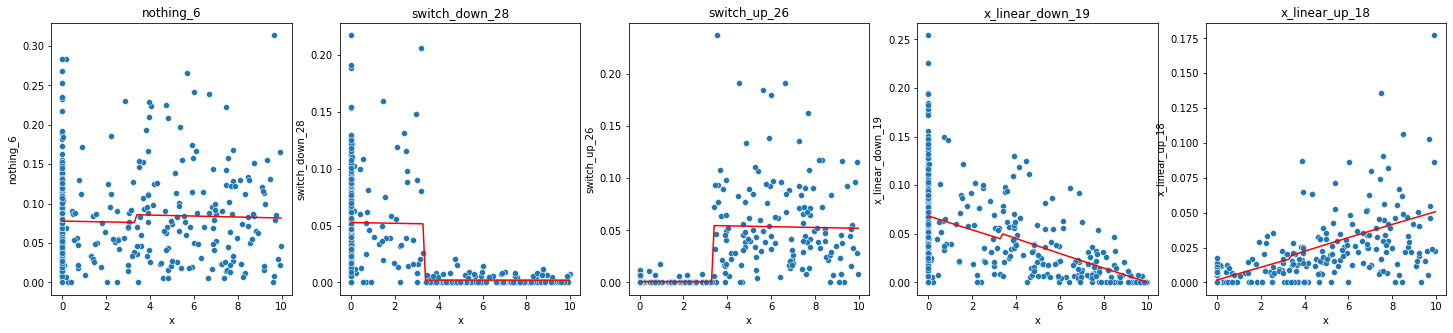

In [ ]:
# let's plot some genes
# biologists are not interested in the number of counts in a cell, but rather it's normalized value: the percentage of counts in a cell that comes from a certain gene
# we give this value the greek symrbol "rho"
# because we're currently using synthetic data, we know the ground truth rho
# what we observe is a very noise value of this for each cell and gene

# select a couple of genes of interest, for each "type"
perturb_id = toy.perturb.var.index[0]

fig, axes = scpyro.plotting.axes_wrap(len(gene_ids))
for gene, ax in zip(gene_ids, axes):
    x = np.log(dataset.perturb.X[perturb_id] + 1)
    sns.scatterplot(x = x, y = dataset.rho[gene], ax = ax)
    sns.lineplot(x = x, y = dataset["rho"][gene], ax = ax, color = "red") # gold standard rho
    ax.set_title(gene)

In [ ]:
gene

'x_linear_up_18'

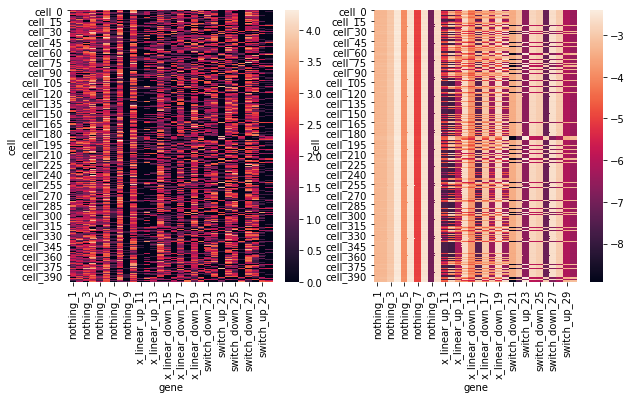

In [ ]:
# this is how the gene expression looks like: cells vs genes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
sns.heatmap(np.log(dataset.counts + 1), ax = ax1) # this is the gene expression as we observe it, i.e. counts. For visualization we often calculate a log(x+1)
sns.heatmap(np.log(dataset["rho"]), ax = ax2) # this is the gold standard "rho" = the fraction that comes from a certain gene. This is what we're mainly interested in

... storing 'type' as categorical


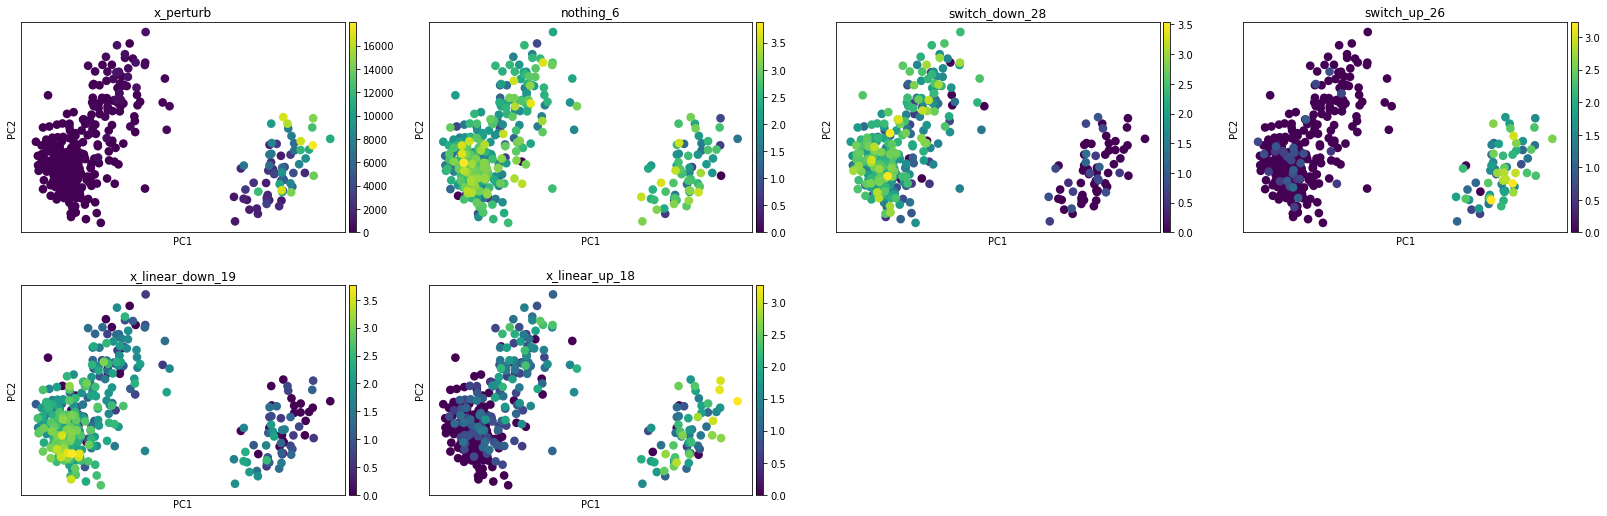

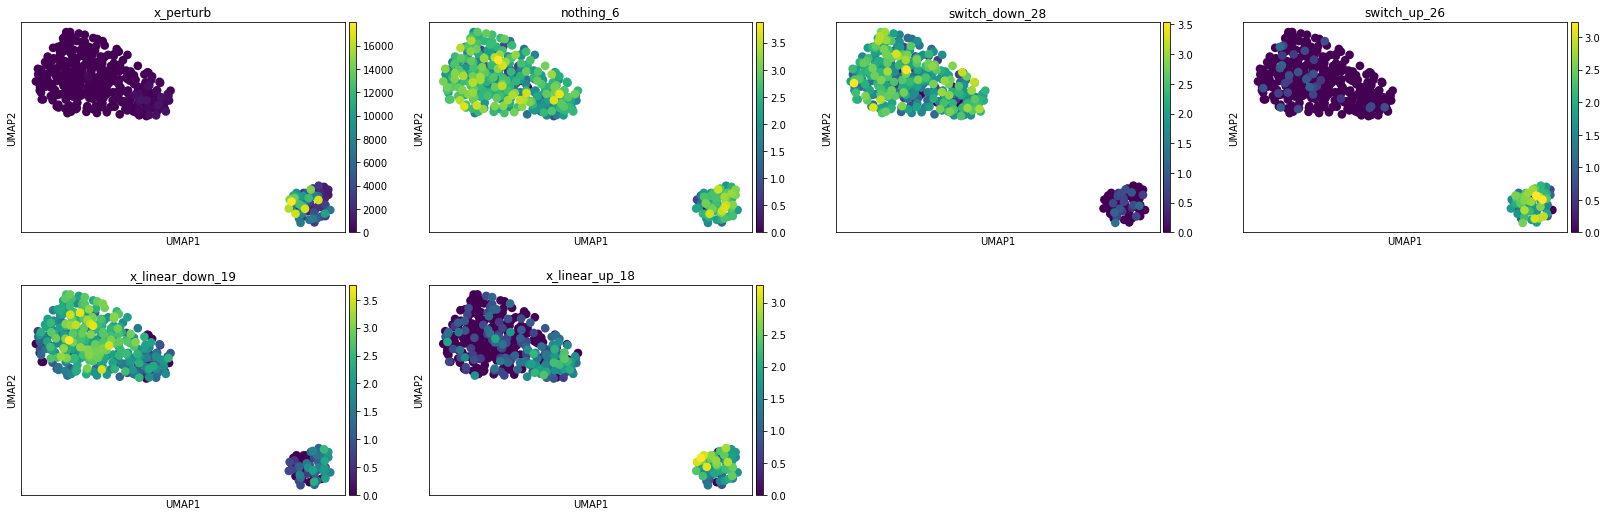

In [ ]:
# single-cell data is often plotted on a pca or umap (non-linear dimensionality reduction)
# we can then plot the perturbation (x_perturb) or the gene expression (e.g. linear_down_19) on this (again often log(x+1) transformed)
# we'll use the scanpy package for this plotting
# you can access this dimensionality reduction using dataset.adata.obsm["X_pca"] or dataset.adata.obsm["X_umap"]
sc.tl.umap(dataset.adata)
sc.pl.pca(dataset.adata, color = ["x_perturb"] + gene_ids.tolist()) # pca
sc.pl.umap(dataset.adata, color = ["x_perturb"] + gene_ids.tolist()) # umap

## Define the model

In [ ]:
# define our model
# check out latento/models.py for explanation!!

model = latento.models.ModelSwitch(dataset)

# model = latento.models.ModelLinear(dataset)
# model = latento.models.ModelSwitch(dataset)

In [ ]:
# we don't use the raw perturbation values, but use log (x + 1) transformed ones
p = np.log(dataset.perturb.X["x"].values + 1)

# we also scale the perturbation values between 0 and 1
p = p / p.max()

# these are the arguments that the inference functions need
infer_args = {"p":p, "Y":dataset.get_Y(), "library":dataset.get_library()}

**Your tasks**

Implement a "switch"-like model, i.e. where the gene expression jumps up or down (=beta) at a particular perturbation value (=switch). 

Because this function is not smooth at p = switch, it can be hard to train using gradient-based optimizers. We therefore approximate the switch model using a "relaxation"* : $$deviation = beta \dfrac{1}{1 + e^{-skew*(p - switch)}}$$ beta and switch are random variables, skew is a fixed value that we choose ourselves and defines the extent of "relaxation", I often choose 50

If there is time left, you can try to implement other models, e.g. an exponential model, or a spline model. But only if there is time left!

*: https://en.wikipedia.org/wiki/Relaxation_(approximation)

## MCMC

In [ ]:
rng_key = jax.random.PRNGKey(0)
rng_key, rng_key_ = jax.random.split(rng_key)

# you may have to adjust some of these parameters if the NUTS samplers doesn't converge during warmup
# you can see this with e.g. the r_hat values
num_warmup, num_samples = 500, 2000

# Run NUTS
kernel = numpyro.infer.NUTS(model.forward)
mcmc = numpyro.infer.MCMC(kernel, num_warmup, num_samples)

mcmc.run(rng_key_, **infer_args)

sample: 100%|██████████| 2500/2500 [35:49<00:00,  1.16it/s, 1023 steps of size 2.06e-03. acc. prob=0.83]


In [ ]:

mcmc.print_summary()

In [ ]:
# get the samples from the posterior
model.eval = True
samples_mcmc = mcmc.get_samples()
mcmc_model_switch_beta = (mcmc.get_samples()['transcriptome/perturb/beta']).mean(0)
mcmc_model_switch_switch = (mcmc.get_samples()['transcriptome/switch']).mean(0)
mcmc_model_switch_beta_variance = (mcmc.get_samples()['transcriptome/perturb/beta']).var(0)
mcmc_model_switch_switch_variance = (mcmc.get_samples()['transcriptome/switch']).var(0)

## Black-box variational inference

In [ ]:
# we again want to do inference, so set eval off
model.eval = False

In [ ]:
import numpyro.infer.autoguide
import tqdm.auto as tqdm

In [ ]:
# we define our variational distribution or "guide"
# we will use the variational distribution to approximate the actual posterior as much as possible
# this is often a simple distribution from which it is easy to sample, in this case an autodiagonal normal
# note that this diagonalnormal distribution is also often called the "mean-field" approximation
guide = numpyro.infer.autoguide.AutoDiagonalNormal(model.forward, init_loc_fn=numpyro.infer.init_to_median)
# we use ADAM for optimization
optim = numpyro.optim.Adam(step_size = 0.01)

# our loss function is the ELBO, which is an approximation (=lower bound) to the actual KL divergence between the guide and the "real" posterior
# you can find several derivations of this on the internet:
# - https://bjlkeng.github.io/posts/variational-bayes-and-the-mean-field-approximation/
# - https://www.ritchievink.com/blog/2019/09/16/variational-inference-from-scratch/
loss = numpyro.infer.Trace_ELBO()

In [ ]:
# number of iterations
n_iterations = 4000

# we will do stochastic variational inference: stochastic because we sample from the prior and posterior (=guide) at each iteration
svi = numpyro.infer.svi.SVI(model.forward, guide, optim, loss)

# define the initial state
rng_key = jax.random.PRNGKey(0)
rng_key, rng_key_ = jax.random.split(rng_key)

current_state = svi.init(rng_key_, **infer_args)

# keep track of the losses
losses = []
progress = tqdm.tqdm(range(n_iterations))
for i in progress:
    # take one step
    current_state, current_loss = svi.update(current_state, **infer_args)
    losses.append(current_loss.item())
    progress.set_description(str(round(current_loss.item(), 2)))

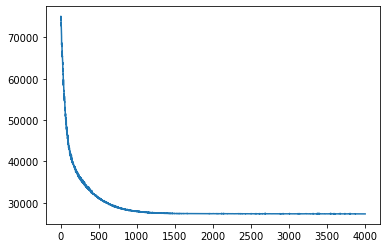

In [ ]:
sns.lineplot(x = range(len(losses)), y = losses)

In [ ]:
# let's get samples from this posterior, in the same format as the samples from the mcmc posterior
model.eval = True

parameters = svi.get_params(current_state) # make sure that you understand what these parameters of the posterior mean (no pun intended)

n_samples = 1000
samples_vi_raw = []

for i in range(n_samples):
    rng_key = jax.random.PRNGKey(i)
    samples_vi_raw.append(guide.sample_posterior(rng_key, parameters))
    
samples_vi = {}
for site_id in samples_vi_raw[0].keys():
    samples_vi[site_id] = jnp.stack([samples_vi_raw[i][site_id] for i in range(len(samples_vi_raw))])

In [ ]:
model.eval = True
# Find the parameter estimates for Variational Inference models
vi_model_switch_beta = samples_vi['transcriptome/perturb/beta'].mean(0)
vi_model_switch_switch = samples_vi['transcriptome/switch'].mean(0)
vi_model_switch_beta_variance = samples_vi['transcriptome/perturb/beta'].var(0)
vi_model_switch_switch_variance = samples_vi['transcriptome/switch'].var(0)
vi_model_switch_beta = samples_vi['transcriptome/perturb/beta'].mean(0)
vi_model_switch_switch = samples_vi['transcriptome/switch'].mean(0)

In [ ]:
model.eval = True

mcmc_model_switch_beta_variance = (mcmc.get_samples()['transcriptome/perturb/beta']).var(0)
mcmc_model_switch_switch_variance = (mcmc.get_samples()['transcriptome/switch']).var(0)
vi_model_switch_beta_variance = samples_vi['transcriptome/perturb/beta'].var(0)
vi_model_switch_switch_variance = samples_vi['transcriptome/switch'].var(0)


Generate Plots to Visualize the parameter Space of Model Switch

In [ ]:
# Give Labels to the different points being plotted

labels = ['nothing' for i in range(10)]
for i in range(10):
  labels.append('linear')

for i in range(10):
  labels.append('switch')
mcmc_model_switch_beta = np.array(mcmc_model_switch_beta)
vi_model_switch_beta = np.array(vi_model_switch_beta )

In [ ]:
df = pd.DataFrame([[ mcmc_model_switch_beta[i], vi_model_switch_beta[i] , labels[i]] for i in range(30)], columns=["mcmc_switch_beta", "vi_switch_beta","labels"  ])

 **Understanding the relation between the expected values of Switch and Beta Parameters from VI and MCMC**

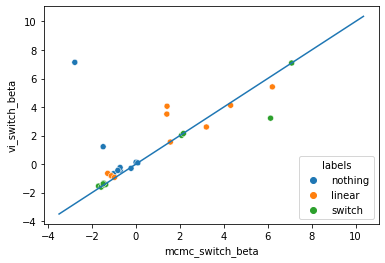

In [ ]:
sns.scatterplot(data=df, x="mcmc_switch_beta", y="vi_switch_beta", hue="labels")
x = [(y-25)*0.14 for y in range(100)]
z = [(y-25)*0.14 for y in range(100)]
plt.plot(x,z)

In [ ]:
mcmc_model_switch_switch = np.array(mcmc_model_switch_switch)
vi_model_switch_switch = np.array(vi_model_switch_switch )

In [ ]:
df = pd.DataFrame([[ mcmc_model_switch_beta[i], vi_model_switch_beta[i], mcmc_model_switch_switch[i], vi_model_switch_switch[i],  labels[i]] for i in range(30)], columns=["mcmc_switch_beta", "vi_switch_beta", "mcmc_switch_switch", "vi_switch_switch", "labels"  ])

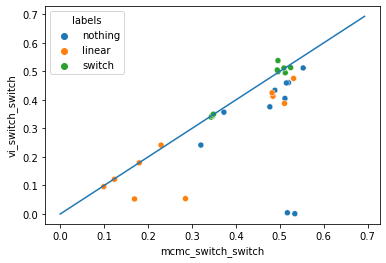

In [ ]:
sns.scatterplot(data=df, x="mcmc_switch_switch", y="vi_switch_switch", hue="labels")
x = [y*0.007 for y in range(100)]
z = [y*0.007 for y in range(100)]
plt.plot(x,z)

Variance Plots

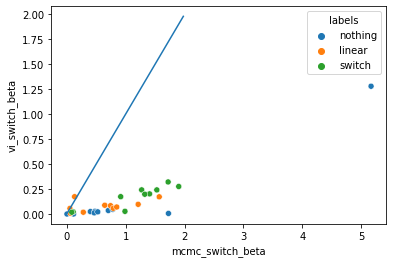

In [ ]:
mcmc_model_switch_beta_variance = np.array(mcmc_model_switch_beta_variance)
mcmc_model_switch_switch_variance = np.array(mcmc_model_switch_switch_variance)
vi_model_switch_beta_variance = np.array(vi_model_switch_beta_variance)
vi_model_switch_switch_variance = np.array(vi_model_switch_switch_variance)
df = pd.DataFrame([[ mcmc_model_switch_beta_variance[i], vi_model_switch_beta_variance[i] , labels[i]] for i in range(30)], columns=["mcmc_switch_beta", "vi_switch_beta","labels"  ])
sns.scatterplot(data=df, x="mcmc_switch_beta", y="vi_switch_beta", hue="labels")
x = [y*0.02 for y in range(100)]
z = [y*0.02 for y in range(100)]
plt.plot(x,z)

Plotting Predictions for different types of Genes

Nothing Genes: The gene which was an outlier in the parameter space

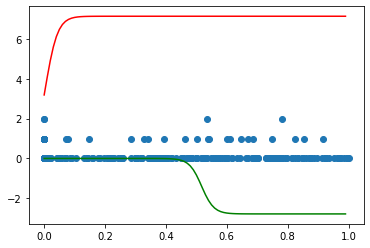

In [ ]:
index = 8

y = (dataset.get_Y()[:,index])
beta1 = vi_model_switch_beta[index]
switch1 = vi_model_switch_switch[index]
beta2 = mcmc_model_switch_beta[index]
switch2 = mcmc_model_switch_switch[index]
a = [y/100 for y in range(100)]
b = [beta1/(1+np.exp(-50*(y-switch1))) for y in a]
a2 = [y/100 for y in range(100)]
b2 = [beta2/(1+np.exp(-50*(y-switch2))) for y in a]

plt.scatter(p,y)
plt.plot(a,b, color = 'red')
plt.plot(a2,b2, color = 'green')

Linear Gene

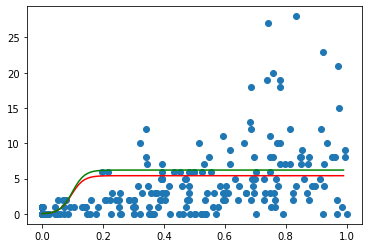

In [ ]:
index = 15

y = (dataset.get_Y()[:,index])
beta1 = vi_model_switch_beta[index]
switch1 = vi_model_switch_switch[index]
beta2 = mcmc_model_switch_beta[index]
switch2 = mcmc_model_switch_switch[index]
a = [y/100 for y in range(100)]
b = [beta1/(1+np.exp(-50*(y-switch1))) for y in a]
a2 = [y/100 for y in range(100)]
b2 = [beta2/(1+np.exp(-50*(y-switch2))) for y in a]

plt.scatter(p,y)
plt.plot(a,b, color = 'red')
plt.plot(a2,b2, color = 'green')

Switch-up Gene

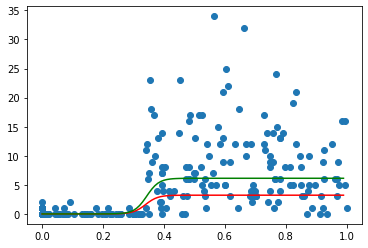

In [ ]:
index = 25

y = (dataset.get_Y()[:,index])
beta1 = vi_model_switch_beta[index]
switch1 = vi_model_switch_switch[index]
beta2 = mcmc_model_switch_beta[index]
switch2 = mcmc_model_switch_switch[index]
a = [y/100 for y in range(100)]
b = [beta1/(1+np.exp(-50*(y-switch1))) for y in a]
a2 = [y/100 for y in range(100)]
b2 = [beta2/(1+np.exp(-50*(y-switch2))) for y in a]

plt.scatter(p,y)
plt.plot(a,b, color = 'red')
plt.plot(a2,b2, color = 'green')

Switch Down

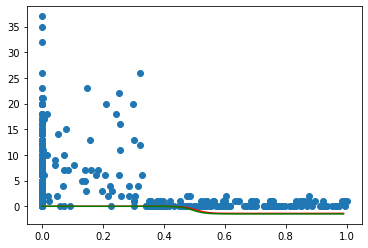

In [ ]:
index = 27

y = (dataset.get_Y()[:,index])
beta1 = vi_model_switch_beta[index]
switch1 = vi_model_switch_switch[index]
beta2 = mcmc_model_switch_beta[index]
switch2 = mcmc_model_switch_switch[index]
a = [y/100 for y in range(100)]
b = [beta1/(1+np.exp(-50*(y-switch1))) for y in a]
a2 = [y/100 for y in range(100)]
b2 = [beta2/(1+np.exp(-50*(y-switch2))) for y in a]

plt.scatter(p,y)
plt.plot(a,b, color = 'red')
plt.plot(a2,b2, color = 'green')

Text(0, 0.5, 'vi_model_switch_beta')

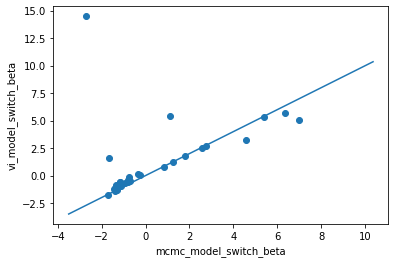

In [ ]:
plt.scatter(mcmc_model_switch_beta, vi_model_switch_beta)
x = [(y-25)*0.14 for y in range(100)]
z = [(y-25)*0.14 for y in range(100)]
plt.plot(x,z)
plt.xlabel('mcmc_model_switch_beta')
plt.ylabel('vi_model_switch_beta')

Text(0, 0.5, 'vi_model_switch_beta')

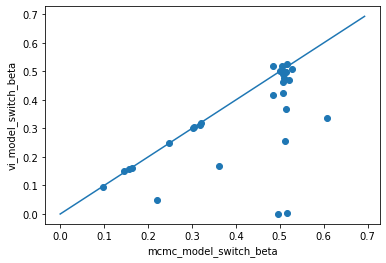

In [ ]:
plt.scatter(mcmc_model_switch_switch, vi_model_switch_switch)
x = [y*0.007 for y in range(100)]
z = [y*0.007 for y in range(100)]
plt.plot(x,z)
plt.xlabel('mcmc_model_switch_beta')
plt.ylabel('vi_model_switch_beta')

Text(0, 0.5, 'vi_model_linear_beta')

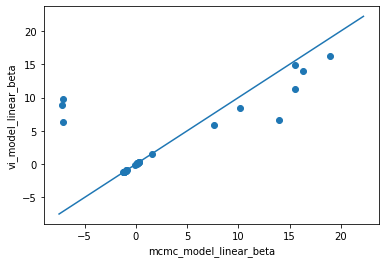

In [ ]:
plt.scatter(mcmc_model_switch_beta, vi_model_switch_beta)
x = [(y-25)*0.3 for y in range(100)]
z = [(y-25)*0.3 for y in range(100)]
plt.plot(x,z)
plt.xlabel('mcmc_model_linear_beta')
plt.ylabel('vi_model_linear_beta')

**Comparison of Different Initializations in VI on the parameter values for the Switch Model**


In [ ]:
guide = numpyro.infer.autoguide.AutoDiagonalNormal(model.forward, init_loc_fn=numpyro.infer.init_to_uniform)

# we use ADAM for optimization
optim = numpyro.optim.Adam(step_size = 0.01)
loss = numpyro.infer.Trace_ELBO()
model.eval = False

n_iterations = 4000

# we will do stochastic variational inference: stochastic because we sample from the prior and posterior (=guide) at each iteration
svi_init = numpyro.infer.svi.SVI(model.forward, guide, optim, loss)

# define the initial state
rng_key = jax.random.PRNGKey(0)
rng_key, rng_key_ = jax.random.split(rng_key)

current_state = svi_init.init(rng_key_, **infer_args)

# keep track of the losses
losses = []
progress = tqdm.tqdm(range(n_iterations))
for i in progress:
    # take one step
    current_state, current_loss = svi_init.update(current_state, **infer_args)
    losses.append(current_loss.item())
    progress.set_description(str(round(current_loss.item(), 2)))

In [ ]:
model.eval = True

parameters = svi_init.get_params(current_state) # make sure that you understand what these parameters of the posterior mean (no pun intended)

n_samples = 1000
samples_vi_raw = []

for i in range(n_samples):
    rng_key = jax.random.PRNGKey(i)
    samples_vi_raw.append(guide.sample_posterior(rng_key, parameters))
    
samples_vi_unif = {}
for site_id in samples_vi_raw[0].keys():
    samples_vi_unif[site_id] = jnp.stack([samples_vi_raw[i][site_id] for i in range(len(samples_vi_raw))])

In [ ]:
model.eval = True
vi_model_switch_beta_unif = samples_vi_unif['transcriptome/perturb/beta'].mean(0)
vi_model_switch_switch_unif = samples_vi_unif['transcriptome/switch'].mean(0)
vi_model_switch_beta_variance_unif = samples_vi_unif['transcriptome/perturb/beta'].var(0)
vi_model_switch_switch_variance_unif = samples_vi_unif['transcriptome/switch'].var(0)

In [ ]:
labels = ['nothing' for i in range(10)]
for i in range(10):
  labels.append('linear')

for i in range(10):
  labels.append('switch')

Text(0, 0.5, 'Beta VI Median')

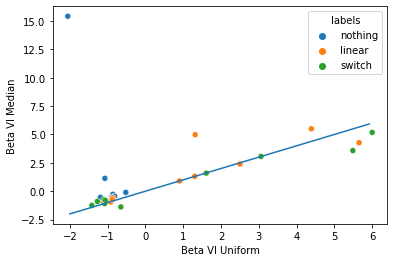

In [ ]:
vi_model_switch_beta_unif = np.array(vi_model_switch_beta_unif)
vi_model_switch_beta = np.array(vi_model_switch_beta)


df = pd.DataFrame([[ vi_model_switch_beta_unif[i], vi_model_switch_beta[i] , labels[i]] for i in range(30)], columns=["vi_switch_beta_unif", "vi_switch_beta","labels"  ])
sns.scatterplot(data=df, x="vi_switch_beta_unif", y="vi_switch_beta", hue="labels")
x = [(y-25)*0.08 for y in range(100)]
#z = [y*0.007 for y in range(100)]
plt.plot(x,x)
plt.xlabel('Beta VI Uniform')
plt.ylabel('Beta VI Median')

Text(0, 0.5, 'Switch VI Median')

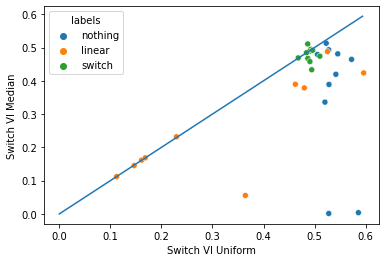

In [ ]:
vi_model_switch_switch_unif = np.array(vi_model_switch_switch_unif)
vi_model_switch_switch = np.array(vi_model_switch_switch)


df = pd.DataFrame([[ vi_model_switch_switch_unif[i], vi_model_switch_switch[i] , labels[i]] for i in range(30)], columns=["vi_switch_switch_unif", "vi_switch_switch","labels"  ])
sns.scatterplot(data=df, x="vi_switch_switch_unif", y="vi_switch_switch", hue="labels")
x = [(y)*0.006 for y in range(100)]
#z = [y*0.007 for y in range(100)]
plt.plot(x,x)
plt.xlabel('Switch VI Uniform')
plt.ylabel('Switch VI Median')

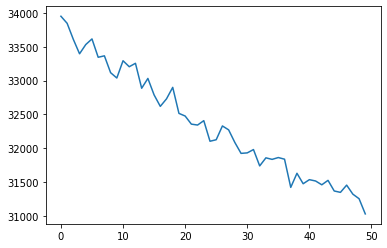

In [ ]:
sns.lineplot(x = range(len(losses)), y = losses)

## Compare MCMC and VI

### Comparing posterior distributions of individual or pairs of parameters

In [ ]:
# choose a gene
gene_ix = 14

# choose some samples, e.g. the dispersion and the 
samples_mcmc_1 = samples_mcmc["transcriptome/dispersion"][:, gene_ix]
samples_vi_1 = samples_vi["transcriptome/dispersion"][:, gene_ix]

samples_mcmc_2 = samples_mcmc["transcriptome/freq"][:, gene_ix]
samples_vi_2 = samples_vi["transcriptome/freq"][:, gene_ix]

NameError: ignored

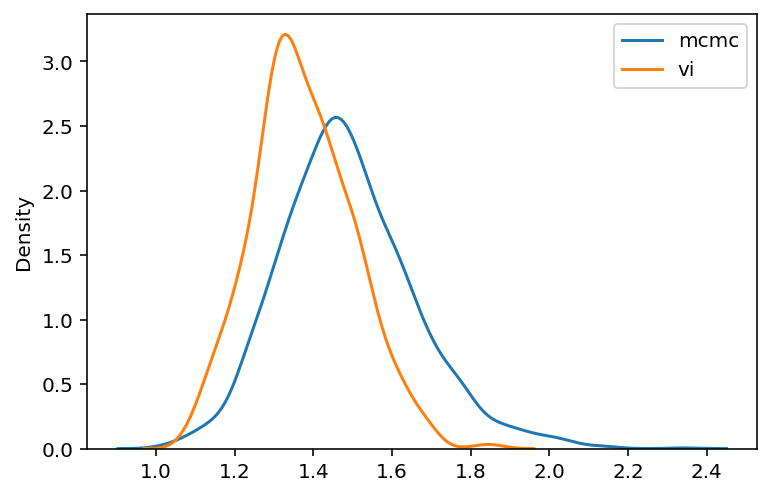

In [ ]:
# compare a single variable
sns.kdeplot(samples_mcmc_1, label = "mcmc")
sns.kdeplot(samples_vi_1, label = "vi")
plt.legend()

/home/wouters/software/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/wouters/software/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


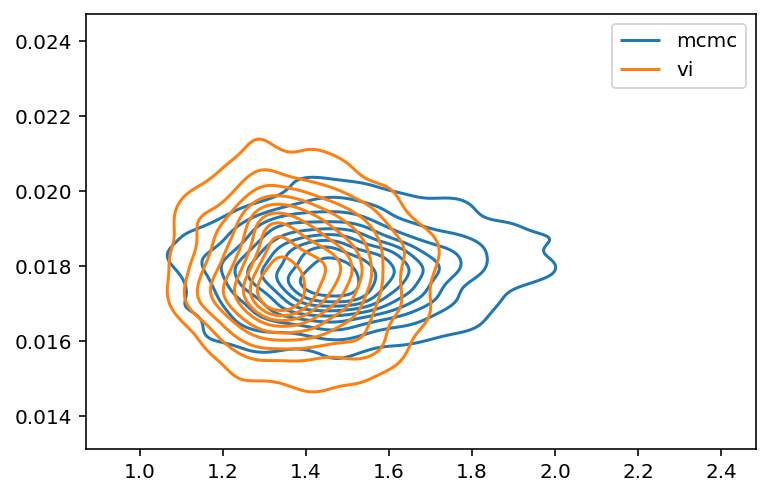

In [ ]:
# compare two variables, e.g. to check dependencies
sns.kdeplot(samples_mcmc_1, samples_mcmc_2, label = "mcmc")
sns.kdeplot(samples_vi_1, samples_vi_2, label = "vi")
plt.legend()

**Your task**

- How does the "exact" posterior look like?
- Does VI provide a good approximation of the mean?
- Does VI provide a good approximation of the variance?
- Does the posterior has any weird features, such as multiple modes or long tails?
- Are there any dependencies within the posterior?

All of these questions you can answer for:

- Is this variable dependent? E.g. dispersion vs beta...
- Is this model dependent? E.g. the "nothing" vs "linear" model...
- Is this gene dependent? E.g. "nothing" genes vs "linear" genes..., check out `dataset.var["type"]` to get the type of a gene

### Comparing models

In [ ]:
model.eval = True

# to check out our model, we will see how gene expression depends on the perturbation
# e.g. if a perturbation is 1, what is the gene expression?
# we do not care about the library so we just fix it to 100
design = {
    "p":jnp.linspace(0, 1, 50),
    "library":jnp.array([100] * 50)
}

In [ ]:
# we give these p and library values to the models and check what the "rho" value is, this is the value we are actually interested in
predictive_mcmc = numpyro.infer.Predictive(model.forward, samples_mcmc, return_sites = ["rho"])
predictions_mcmc = predictive_mcmc(rng_key_, **design)

predictive_vi = numpyro.infer.Predictive(model.forward, samples_vi, return_sites = ["rho"])
predictions_vi = predictive_vi(rng_key_, **design)

In [ ]:
# which genes do we want to plot
gene_ixs = dataset.feature_ix(gene_ids).tolist()

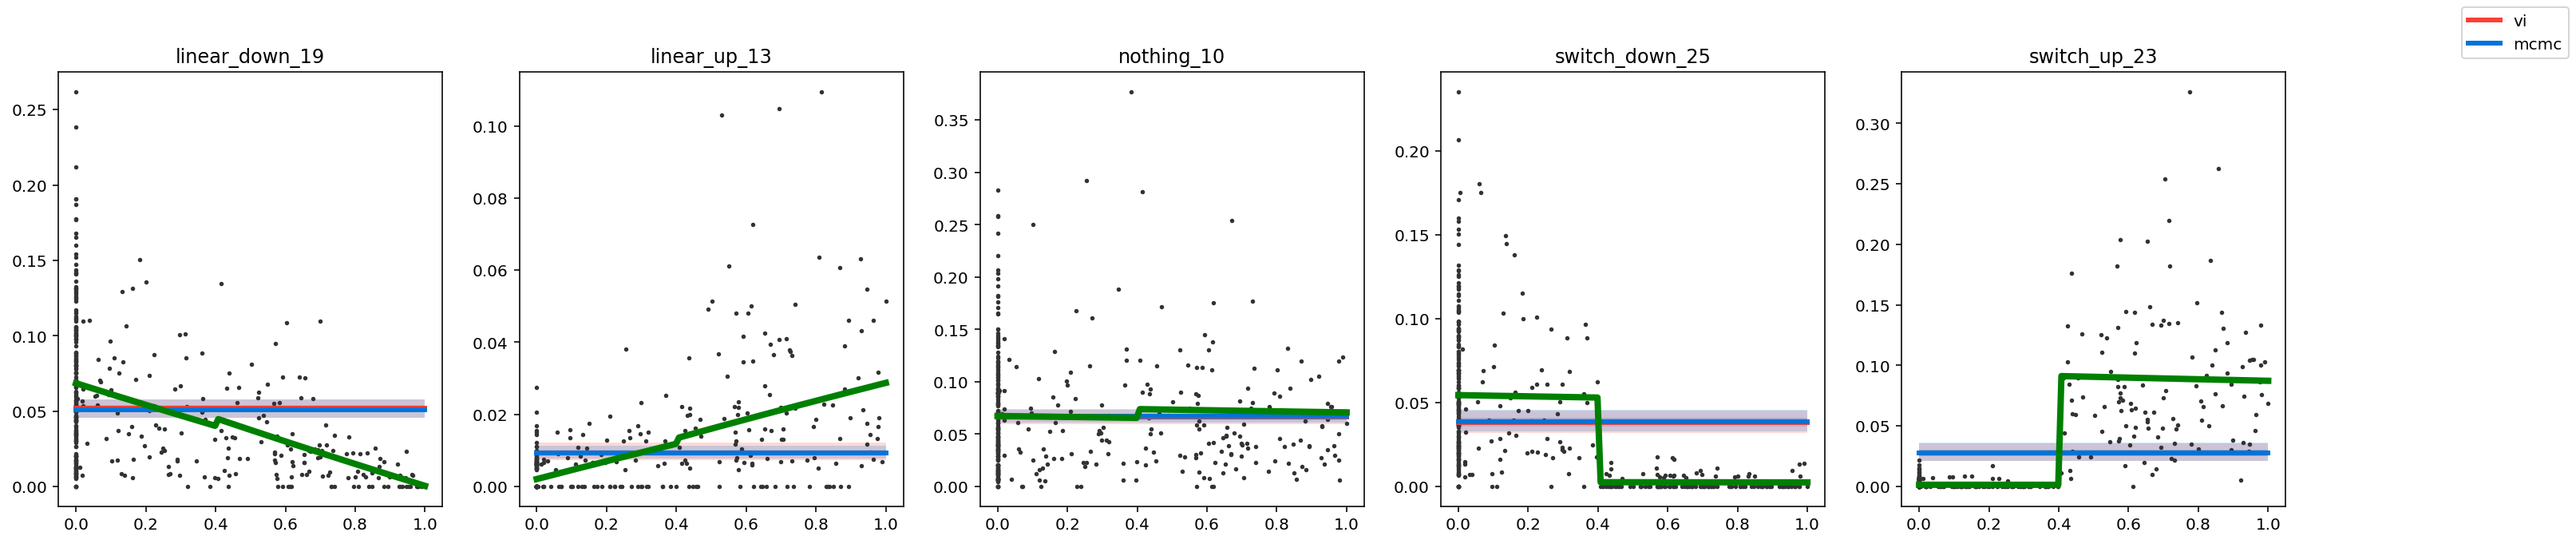

In [ ]:
# plot the models for the genes
x = design["p"]
Ys = {"vi":predictions_vi["rho"], "mcmc":predictions_mcmc["rho"]}
model_colors = {"vi":"#FF4136", "mcmc":"#0074D9"}

# empirical values
x_empirical = infer_args["p"]
Y_empirical = dataset.rho.values

# gold standard values (we have these because this is toy data)
x_gs = infer_args["p"]
Y_gs = dataset["rho"].values

rho = dataset

fig, axes = scpyro.plotting.axes_wrap(len(gene_ixs))

legend_artists = {}
for gene_ix, ax in zip(gene_ixs, axes):
    # plot models
    for model_id, Y in Ys.items():
        y = Y[:, :, gene_ix]
        
        color = model_colors[model_id]

        q_left = [0.99, 0.8, 0.65] # which upper quantiles to plot
        q = q_left + [0.5] + [round(1 - q, 3) for q in q_left[::-1]] # which quantiles to plot
        qy = np.quantile(y, q, 0)
        qmed = qy[len(q_left)]

        for i in range(len(q_left)):
            artist = ax.fill_between(x, qy[i], qy[-i-1], color = color, lw = 0, alpha = 0.2)
            pass
        artist = ax.plot(x, qmed, color = color, lw = 3)
        legend_artists[model_id] = artist[0]
        
    # plot empirical
    y_empirical = Y_empirical[:, gene_ix]
    ax.scatter(x_empirical, y_empirical, s = 3, color = "#333333")
    
    # plot gold standard
    y_gs = Y_gs[:, gene_ix]
    sns.lineplot(x = x_gs, y = y_gs, ax = ax, color = "green", lw = 4) # gold standard rho
    
    ax.set_title(dataset.symbol(feature_ix = gene_ix))
fig.legend(legend_artists)

To compare models (e.g. a "nothing" model vs a "linear" model), we will check their "Posterior Predictive Density", which is essentially the likelihood of the observations based on the posterior distribution.

Note that this value does not account for overfitting, and complex models will typically have a higher posterior predictive density. We therefore have to use cross-validation (or, if there are latent variables, bayesian model selection). It's up to you to implement this.

In [ ]:
model_conditioned = numpyro.handlers.condition(numpyro.handlers.seed(model.forward, rng_key), {})
model_trace = numpyro.handlers.trace(model_conditioned).get_trace(**infer_args)
obs_node = model_trace['transcriptome']

In [ ]:
def log_likelihood(rng_key, params, model, *args, **kwargs):
    model_conditioned = numpyro.handlers.condition(numpyro.handlers.seed(model, rng_key), params)
    model_trace = numpyro.handlers.trace(model_conditioned).get_trace(*args, **kwargs)
    obs_node = model_trace['transcriptome']
    return obs_node['fn'].base_dist.log_prob(obs_node['value']) # remove the event dimensions by using the base dist as we're interested in the log probability per gene

def log_pred_density(rng_key, samples, model, *args, **kwargs):
    n = list(samples.values())[0].shape[0]
    log_lk_fn = jax.vmap(lambda rng_key, params: log_likelihood(rng_key, params, model, *args, **kwargs))
    log_lk_vals = log_lk_fn(jax.random.split(rng_key, n), samples)
    return (jax.scipy.special.logsumexp(log_lk_vals, 0) - jnp.log(n))

In [ ]:
lpd = log_pred_density(rng_key, samples_mcmc, model.forward, **infer_args)

In [ ]:
lpd_gene = lpd.mean(0) # the mean log predictive density for a gene across all cells
lpd_gene

DeviceArray([-2.725937  , -2.7962787 , -2.9644647 , -3.5035512 ,
             -2.2399817 , -3.392265  , -1.4533625 , -3.3620374 ,
             -0.45817277, -3.295496  , -0.8435185 , -1.8937329 ,
             -1.588212  , -3.174781  , -2.1340961 , -1.7290673 ,
             -2.8618035 , -1.8671995 , -3.081276  , -2.1334066 ,
             -2.2426786 , -2.6731837 , -2.0725412 , -2.905181  ,
             -2.8017533 , -1.7164901 , -2.9579282 , -2.7482495 ,
             -1.8187214 , -1.7439204 ], dtype=float32)

**Your task**

- Compare the log predictive density for each gene for different models. Do they make sense? I.e. for genes that do not change with the perturbation, the lpd should be approximately the same for different models. For genes that have a linear pattern, the best model should be linear. Etc...
- Could we make some wrong conclusions if we use VI instead of getting an exact posterior using e.g. MCMC? Could we for example choose an incorrect model? Could we be overconfident?

Again...

- Is this dependent on the type of gene? (nothing, linear, switch, ...)